# Gym Retro Basics

## Introduction

This notebooks describes the basics of using the [gym-retro](https://openai.com/index/gym-retro/) package. This package allows for reinforcement learning on retro games. Additional documentation on the package is available [here](https://retro.readthedocs.io/en/latest/index.html). Moreover, the original implementation is no longer supported, but the [stable-retro](https://github.com/Farama-Foundation/stable-retro?tab=readme-ov-file) repository is available with updated fixes, which is the current version used by this notebook.

As far this particular notebook is concerned, the goal is to setup some basics and understand how to interact with gym-retro.

In [11]:
[x for x in retro.data.list_games() if 'Street' in x]

['BadStreetBrawler-Nes',
 'StreetFighterIISpecialChampionEdition-Genesis',
 'StreetSmart-Genesis',
 'StreetsOfRage-Genesis',
 'StreetsOfRage2-Genesis',
 'StreetsOfRage3-Genesis',
 'StreetsOfRageII-Sms']

## Configuration

In [1]:
# load libraries
import retro
import matplotlib.pyplot as plt

## Gym Retro

A gym-retro environment can be created by using `retro.make`. Here we create one for `'Airstriker-Genesis'` which is a non-commercial ROM that is included by default. 

In [2]:
# Load the environment
env = retro.make(game='Airstriker-Genesis', render_mode='rgb_array', record='.')
env_array, env_status = env.reset()

First thing to do is to understand our action space. The action space determine the inputs for our game. In the case of `'Airstriker-Genesis'`, there are 12 possible actions. Each action mapping to a button in a sega genesis controller.

In [3]:
print(env.action_space)

MultiBinary(12)


### Mapping Explanation
The Sega Genesis controller typically has the following buttons:

* B
* C
* A
* Start
* Right
* Left
* Down
* Up
* Z (optional, 6-button controller)
* Y (optional, 6-button controller)
* X (optional, 6-button controller)
* Mode (optional, 6-button controller)

In gym-retro, each button is represented as a binary value (0 or 1) in an array. For example:

* [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] means only the C button is pressed.
* [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] means only the Start button is pressed.

### Pressing Start

Putting it all together, we can press start then observe the result.

Reward received: 0.0
Game done: False
Truncated: False
Info: {'lives': 3, 'score': 0, 'gameover': 9}


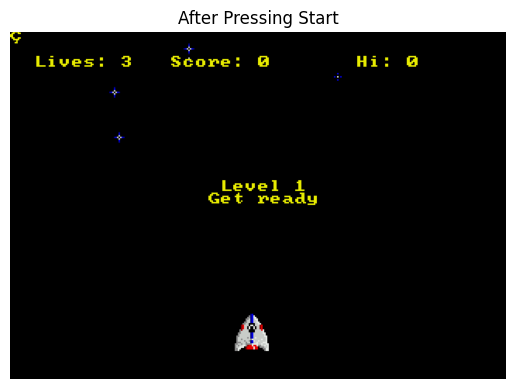

In [4]:
start_action = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # Press Start
obs, reward, done, truncated, info = env.step(start_action)

print(f"Reward received: {reward}")
print(f"Game done: {done}")
print(f"Truncated: {truncated}")
print(f"Info: {info}")

plt.imshow(obs)
plt.title("After Pressing Start")
plt.axis('off')
plt.show()


### Playing Random Actions

We can now play a large number of random actions then occasionally observe the output. Below the code runs until all lives are lost. The status of the game is displayed after changes in the score and/or lost lives. It showcases the basic structure for running a game of `'Airstriker-Genesis'`.

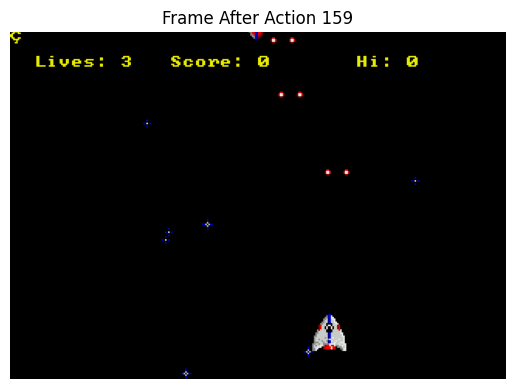

Reward received: 20.0
Game done: False
Truncated: False
Info: {'lives': 3, 'score': 20, 'gameover': 9}


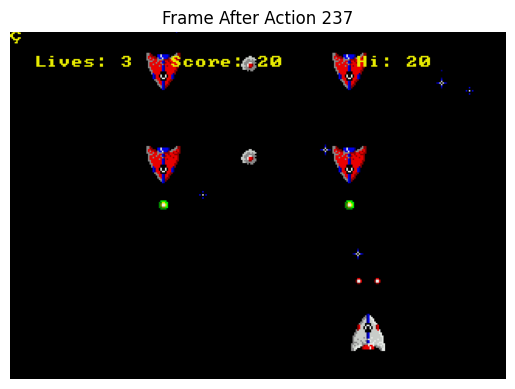

Reward received: 20.0
Game done: False
Truncated: False
Info: {'lives': 3, 'score': 40, 'gameover': 9}


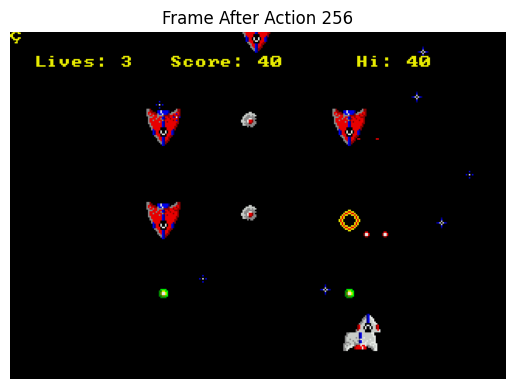

Reward received: 20.0
Game done: False
Truncated: False
Info: {'lives': 3, 'score': 60, 'gameover': 9}


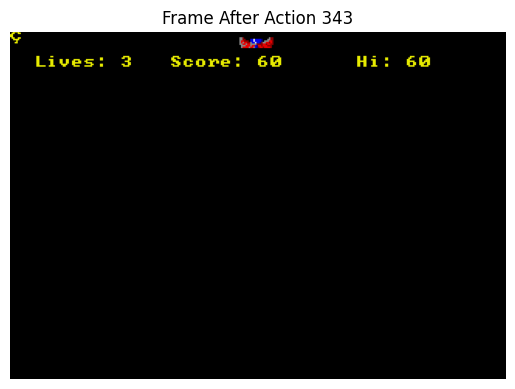

Reward received: 0.0
Game done: False
Truncated: False
Info: {'lives': 2, 'score': 60, 'gameover': 2}


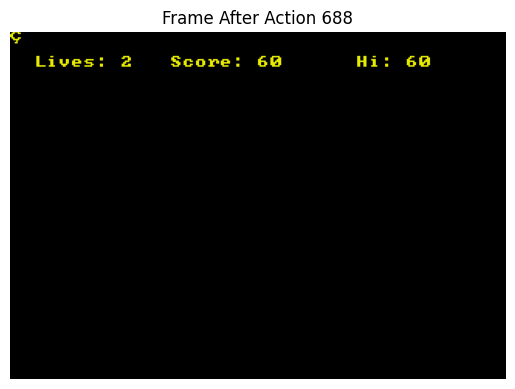

Reward received: 0.0
Game done: False
Truncated: False
Info: {'lives': 1, 'score': 60, 'gameover': 2}


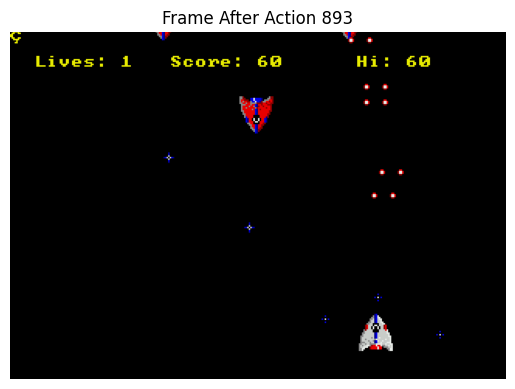

Reward received: 20.0
Game done: False
Truncated: False
Info: {'lives': 1, 'score': 80, 'gameover': 9}


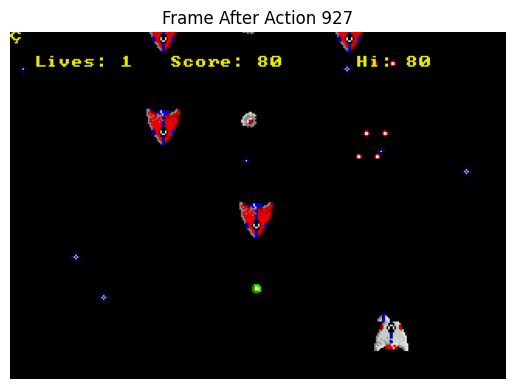

Reward received: 20.0
Game done: False
Truncated: False
Info: {'lives': 1, 'score': 100, 'gameover': 9}


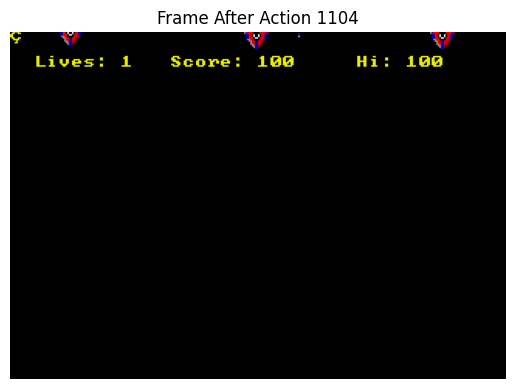

Reward received: 0.0
Game done: False
Truncated: False
Info: {'lives': 0, 'score': 100, 'gameover': 2}
Game Over


In [5]:

start_action = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
env_step_action = env.step(start_action)

step = 0
p_score = 0
p_lives = 3
while True:

    # Take a random action
    rnd_action = env.action_space.sample()
    env_step_action = env.step(rnd_action)
    obs, reward, done, truncated, info = env_step_action
    step += 1

    score = info['score']
    lives = info['lives']
    
    if score > p_score or info['lives'] < p_lives :            

        p_score = score
        p_lives = lives
        
        plt.imshow(obs)
        plt.title(f"Frame After Action {step + 1}")
        plt.axis('off')
        plt.show()

        print(f"Reward received: {reward}")
        print(f"Game done: {done}")
        print(f"Truncated: {truncated}")
        print(f"Info: {info}")
    
        # End the loop if the game is done
        if lives == 0 or done or truncated:
            print("Game Over")
            break


### Recording and replaying gameplay

The environment above was set to record the gameplay. We can easily generate a video from our gameplay recording until the terminal command below.

In [9]:
# render gameplay video
!xvfb-run -s "-screen 0 1400x900x24" python3 -m retro.scripts.playback_movie Airstriker-Genesis-Level1-000000.bk2

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/aarch64-linux-gnu --incdir=/usr/include/aarch64-linux-gnu --arch=arm64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis -